In [1]:
import os
os.chdir("../")
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [2]:
import jax.numpy as jnp
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_probability.substrates.jax as tfp
dist = tfp.distributions
import pandas as pd
import jax.numpy as jnp
from datetime import datetime
from sklearn.preprocessing import StandardScaler
import time
import numpy as np

In [3]:
from flax import linen as nn
import jax
import jax.numpy as jnp
import optax
from sklearn.model_selection import train_test_split


In [4]:
def dataset_load(appliances, train, test=None,split_factor=0.3):
    x_train = []
    y_train = []
    scaler_x = StandardScaler()
    scaler_y = StandardScaler()
    app = 0
    y_ground = pd.DataFrame()
    #train
    for key, values in train.items():
        for app in range(len(appliances)):
            df = pd.read_csv(f"datasets/Building{key}_NILM_data_basic.csv", usecols=["Timestamp","main", appliances[app]])
            df["date"] = pd.to_datetime(df["Timestamp"]).dt.date
            startDate = datetime.strptime(values["start_time"], "%Y-%m-%d").date()
            endDate = datetime.strptime(values["end_time"], "%Y-%m-%d").date()
            
            if startDate > endDate:
                raise "Start Date must be smaller than Enddate."
            
            df = df[(df["date"] >= startDate) & (df["date"] <= endDate)]
            df.dropna(inplace=True)
            if app == 0:
                x = df[appliances[app]].values
                y = jnp.array(df[appliances[app]].values).reshape(-1,1)
            else:
                x += df[appliances[app]].values
                y = jnp.concatenate((y,jnp.array(df[appliances[app]].values).reshape(-1,1)), axis=1)
        # x = df["main"].values
        # y = df[appliances[0]].values
        # x = jnp.pad(x, (units_to_pad, units_to_pad), 'constant', constant_values = (0,0))
        # x = jnp.array([x[i: i + n] for i in range(len(x) - n + 1)])
        x_train.extend(x)
        y_train.extend(y)
    
    # print(x_train.shape)
    x_train = jnp.array(x_train).reshape(-1,1)    
    # print(x_train.shape)
    y_train = jnp.array(y_train).reshape(-1,3)
    # print(y_train.shape)
    x_train = scaler_x.fit_transform(x_train)
    y_train = scaler_y.fit_transform(y_train)

    #test
    x_test = []
    y_test = []
    x_test_timestamp = []
    y_ground = jnp.array([])
    app = 0
    for key, values in test.items():
        for app in range(len(appliances)):
            df = pd.read_csv(f"datasets/Building{key}_NILM_data_basic.csv", usecols=["Timestamp","main", appliances[app]])
            df["date"] = pd.to_datetime(df["Timestamp"]).dt.date
            startDate = datetime.strptime(values["start_time"], "%Y-%m-%d").date()
            endDate = datetime.strptime(values["end_time"], "%Y-%m-%d").date()
            
            if startDate > endDate:
                raise "Start Date must be smaller than Enddate."     
            df = df[(df["date"] >= startDate) & (df["date"] <= endDate)]
            df.dropna(inplace=True)
            if app == 0:
                x = df[appliances[app]].values
                y = jnp.array(df[appliances[app]].values).reshape(-1,1)
            else:
                x += df[appliances[app]].values
            # df[appliances[app]].values
                y = jnp.concatenate((y,jnp.array(df[appliances[app]].values).reshape(-1,1)), axis=1)
        # x = df["main"].values
        # y = df[appliances[0]].values
        # x = jnp.pad(x, (units_to_pad, units_to_pad), 'constant', constant_values = (0,0))
        # x = jnp.array([x[i: i + n] for i in range(len(x) - n + 1)])
        # x = df["main"].values
        # y = df[appliances[0]].values
        timestamp = df["Timestamp"].values
        # x = jnp.pad(x, (units_to_pad, units_to_pad), 'constant', constant_values = (0,0))
        # x = jnp.array([x[i: i + n] for i in range(len(x) - n + 1)])
        x_test.extend(x)
        y_test.extend(y)
        x_test_timestamp.extend(timestamp)
    
    # print(y_test.shape)
    x_test = jnp.array(x_test).reshape(-1,1)
    y_test = jnp.array(y_test).reshape(-1,3)
    # print(y_test.shape)
    x_test = scaler_x.transform(x_test)
    x_train = jnp.array(x_train).reshape(x_train.shape[0], 1)
    y_train = jnp.array(y_train).reshape(x_train.shape[0],3)
    x_test = jnp.array(x_test).reshape(x_test.shape[0], 1)
    y_test = jnp.array(y_test).reshape(x_test.shape[0],3)
    # x_train,x_cal , y_train, y_cal = train_test_split(x_train, y_train, test_size=split_factor, random_state=42)
    return x_train, y_train, x_test, y_test, x_test_timestamp, scaler_x, scaler_y

In [5]:
# appliances = ["Microwave", "Refrigerator",  "Dish Washer"] #
# df1 = pd.read_csv(f"datasets/Building{2}_NILM_data_basic.csv", usecols=["Timestamp",*appliances])
# df1.dropna(inplace=True)
# df1["date"] = pd.to_datetime(df1["Timestamp"]).dt.date
# key, values = list(test.items())[0]
# startDate = datetime.strptime(values["start_time"], "%Y-%m-%d").date()
# endDate = datetime.strptime(values["end_time"], "%Y-%m-%d").date()
# if startDate > endDate:
#     raise "Start Date must be smaller than Enddate."     
# df1 = df1[(df1["date"] >= startDate) & (df1["date"] <= endDate)]
# df1 = df1[appliances]
# print(df1)
# arr = jnp.array(df1)
# # arr, arr.shape

In [6]:
train ={
    
    1:{
        'start_time': "2011-04-28" ,
        'end_time': "2011-05-15"
                },
    3: {
            'start_time': "2011-04-19" ,
            'end_time': "2011-05-22"
        }
                }
test = { 2: {
                'start_time': "2011-04-21" ,
                'end_time': "2011-05-21"
                },
                }

appliances = ["Microwave", "Refrigerator",  "Dish Washer"] #

In [7]:
x_train, y_train, x_test, y_test, x_test_timestamp, scaler_x, scaler_y = dataset_load(appliances, train, test)

In [8]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((24918, 1), (24918, 3), (15656, 1), (15656, 3))

In [9]:
class MyMLP(nn.Module):
    features: list
    @nn.compact  
    def __call__(self, x):
        for i, feature in enumerate(self.features):
            x = nn.Dense(feature, name=f"{i}_Dense")(x)
            if i != len(self.features)-1:
                x = nn.relu(x)
            if i == len(self.features)-1:
                x = nn.softmax(x)
                # if (main_x.all() == (x[:,0].reshape(-1,1)*main_x.reshape(-1,1)  + x[:,1].reshape(-1,1)*main_x.reshape(-1,1)  + x[:,2].reshape(-1,1)*main_x.reshape(-1,1) ).all()):
                #     print("Constraint Successfull")
                print(x.shape)

        return x

In [10]:
k1, k2 = jax.random.split(jax.random.PRNGKey(0), 2)
model = MyMLP(features=[256, 128, 64, 16, 3])
params = model.init(k1 , x_train)

(24918, 3)


In [11]:
# import jaxopt

# def loss(params, x, y_true):
#   y_pred = model.apply(params, x)
#   y_pred *= x
#   return jnp.mean(jnp.square(jnp.array(y_pred) - jnp.array(y_true)))
  
# solver = jaxopt.ScipyMinimize(fun=loss, method="L-BFGS-B")
# soln = solver.run(params, x_train,y_train)

  0%|          | 0/1000 [00:00<?, ?it/s]

(24918, 3)


100%|██████████| 1000/1000 [01:27<00:00, 11.39it/s]


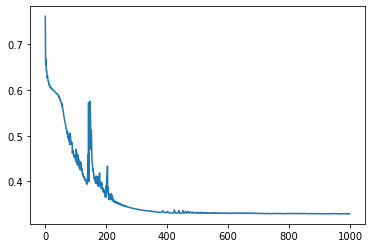

In [12]:
from tqdm import trange
import optax

def loss(params, x, y_true):
  y_pred = model.apply(params, x)
  y_pred *= x
  return jnp.mean(jnp.square(jnp.array(y_pred) - jnp.array(y_true)))

lr = 0.001
loss_func = jax.jit(jax.value_and_grad(loss))
optimizer = optax.adam(learning_rate=lr)
state = optimizer.init(params)
losses=[]
for i in trange(1000):
  l, g = loss_func(params, x_train, y_train)
  losses.append(l)
  # params = jax.tree_util.tree_map(lambda p, g: p - lr*g, params, g)
  update, state = optimizer.update(g, state)
  params = optax.apply_updates(params, update)
plt.plot(losses)
# print(params)

(15656, 3)
(15656, 3) (15656, 3)


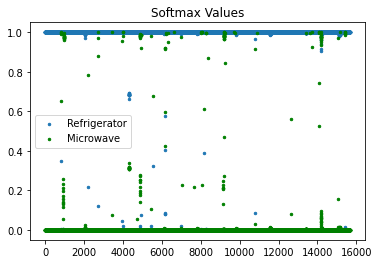

In [43]:
y_pred = model.apply(params, x_test)
plt.scatter(jnp.arange(x_test.shape[0]),y_pred[:,1].reshape(-1,), label="Refrigerator",s=6)
# plt.scatter(jnp.arange(x_test.shape[0]),y_pred[:,0], label="Dishwasher",s=6)
plt.scatter(jnp.arange(x_test.shape[0]),y_pred[:,2], label="Microwave",s=6,c='g')
plt.legend()
plt.title("Softmax Values")
y_pred *= x_test
y_pred = scaler_y.inverse_transform(y_pred)
print(y_pred.shape, y_test.shape)
rmse = jnp.sqrt(jnp.mean(jnp.square(jnp.subtract(y_pred[:,0], y_test[:,0]))))
rmse1 = jnp.sqrt(jnp.mean(jnp.square(jnp.subtract(y_pred[:,1], y_test[:,1]))))
rmse2 = jnp.sqrt(jnp.mean(jnp.square(jnp.subtract(y_pred[:,2], y_test[:,2]))))

In [14]:
y_pred

array([[ 9.8882265, 20.218273 , 11.276931 ],
       [ 9.8882265, 20.277708 , 11.276931 ],
       [ 9.8882265, 20.188557 , 11.276931 ],
       ...,
       [ 9.8882265, 92.75784  , 11.276931 ],
       [ 9.8882265, 92.63898  , 11.276931 ],
       [ 9.8882265, 92.15162  , 11.276931 ]], dtype=float32)

In [15]:
rmse, rmse1, rmse2

(DeviceArray(68.46766, dtype=float32),
 DeviceArray(52.952625, dtype=float32),
 DeviceArray(71.10178, dtype=float32))

Text(0, 0.5, 'Power')

<Figure size 432x288 with 0 Axes>

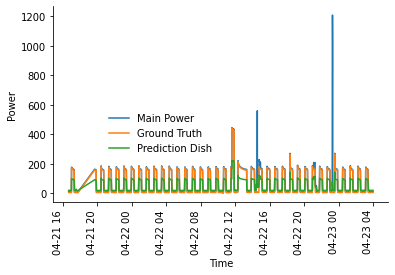

In [20]:
idx = 2000 #x2.shape[0]
start = 1000

plt.figure()
# latexify(width_scale_factor=2, fig_height=1.75)
df = pd.read_csv("./time_stamp.csv", index_col=0)
df.index = df["0"]
df.index = pd.to_datetime(df.index)
df.index.name = "Time"
df = df.drop(columns=["0"])
df["Main Power"] =  scaler_x.inverse_transform(x_test.reshape(-1,1) )
app = 1
df["Ground Truth"] = y_test[:,app]
df["Prediction Dish"] = y_pred[:,app]
df[start:start+idx].plot(rot=90)
sns.despine()
# df.plot.( rotation=90)
plt.legend(frameon=False, bbox_to_anchor=(0.5, 0.5))
# df.head()
# plt.ylim(0,350)
plt.ylabel("Power")